

<center> <h1> <b><span style="color:red"> 
Predictive Analysis <br><br>
Lab 5<br><br>
Understanding Logistic Regression Tables<br></span></b></h1>


## Import the relevant libraries



### information about the dataset: 
Create a logistic regression based on the bank data provided in BB.

The data is based on the marketing campaign efforts of a Portuguese banking institution.The classification goal is to predict if the client will subscribe a term deposit (variable y).
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting. we  use the dependent variable  'duration' to predict 'y'. 

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    
</i>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load the data

Load the ‘Bank_data.csv’ dataset under BB.
#Make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.

#Remove the index column thata comes with the data

#Use the map function to change any 'yes' values to 1 and 'no'values to 0. 

In [2]:
data= pd.read_csv("Bank_data.csv")
data = data.drop(columns=['Unnamed: 0'])
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
# Using map function
data['y'] = data['y'].map({"yes": 1, "no": 0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  518 non-null    float64
 1   credit         518 non-null    float64
 2   march          518 non-null    float64
 3   may            518 non-null    float64
 4   previous       518 non-null    float64
 5   duration       518 non-null    float64
 6   y              518 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 28.5 KB


In [5]:
miss = data.isna()
miss.sum()

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [6]:
x = data[["duration"]]
y = data["y"]

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot.

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [8]:
model.intercept_

array([-1.63233799])

In [9]:
model.coef_

array([[0.00494578]])

In [10]:
model.predict(x)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [11]:
x_prob = model.predict_proba(x)
x_prob

array([[0.7414813 , 0.2585187 ],
       [0.56885833, 0.43114167],
       [0.69134034, 0.30865966],
       ...,
       [0.54935432, 0.45064568],
       [0.3302587 , 0.6697413 ],
       [0.71708288, 0.28291712]])

In [12]:
model.score(x, y)

0.694980694980695

In [13]:
confusion_matrix(y, model.predict(x))

array([[204,  55],
       [103, 156]], dtype=int64)

<AxesSubplot:xlabel='duration', ylabel='y'>

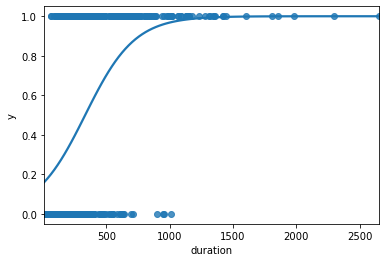

In [14]:
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

Text(0, 0.5, 'y')

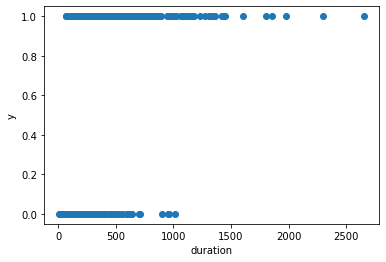

In [15]:
#matplotlib scatter funcion w/ logistic regression
plt.scatter(x,y)
plt.xlabel("duration")
plt.ylabel("y")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[["duration"]], data.y, test_size=0.2)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
model.score(X_test, y_test)

0.75

In [20]:
model.predict_proba(X_test)

array([[7.15368164e-01, 2.84631836e-01],
       [4.30100890e-02, 9.56989911e-01],
       [7.65834290e-01, 2.34165710e-01],
       [1.73746892e-01, 8.26253108e-01],
       [6.29228092e-01, 3.70771908e-01],
       [4.51051713e-01, 5.48948287e-01],
       [7.38289874e-01, 2.61710126e-01],
       [1.44172518e-01, 8.55827482e-01],
       [5.22488170e-01, 4.77511830e-01],
       [6.97162489e-01, 3.02837511e-01],
       [7.96589608e-01, 2.03410392e-01],
       [7.08737702e-01, 2.91262298e-01],
       [7.35603084e-01, 2.64396916e-01],
       [7.12537678e-01, 2.87462322e-01],
       [1.11378834e-01, 8.88621166e-01],
       [1.71766184e-01, 8.28233816e-01],
       [7.63339633e-01, 2.36660367e-01],
       [5.95244465e-01, 4.04755535e-01],
       [1.95276265e-01, 8.04723735e-01],
       [6.36740850e-01, 3.63259150e-01],
       [7.25601595e-01, 2.74398405e-01],
       [4.63663419e-01, 5.36336581e-01],
       [4.86702032e-01, 5.13297968e-01],
       [1.49379146e-01, 8.50620854e-01],
       [6.205650

In [21]:
model.predict(150)

ValueError: Expected 2D array, got scalar array instead:
array=150.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:xlabel='duration', ylabel='y'>

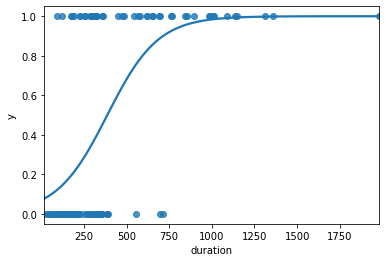

In [22]:
sns.regplot(x=X_test, y=y_test, data=data, logistic=True, ci=None)

### Interpretation
What is the model used, 
What method is used.
what is the value of Pseudo R-squared? What does it mean?
What is the coefficient of the duration variable. what does it mean?